In [41]:
# Import of packages
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

In [16]:
def kernel(x, y, typeKer = "linear", p = 4, sigma = 0.5, kappa = 0.1, delta = 0.2):
    if typeKer == "linear":
        k = np.dot(x,y) + 1
    elif typeKer == "poly":
        k = (np.dot(x,y) + 1) ** p
    elif typeKer == "radial":
        k = math.exp(-(np.dot(x-y,x-y))/(2*sigma))
    elif typeKer == "sigmoid":
        k = math.atanh(kappa * np.dot(x,y) - delta)

    return k

In [194]:
def lagrange(params, eps, X, t, kernel):
    N2 = np.shape(params)[0]
    N = int(N2/2)
    a = params[0:N].reshape((N,1))
    a_hat = params[N:N2].reshape((N,1))
    t = t.reshape((N,1))
    K = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            K[i,j] = kernel(X[i],X[j])
    L = -(1/2) * (a - a_hat).T.dot(K).dot(a - a_hat) - eps * np.trace(a + a_hat) + (a - a_hat).T.dot(t)
    return L   

In [201]:
N = 50
tr = 0.6
ts = 0.4
N_tr = int(N*tr)
N_ts = int(N*ts)
x = np.linspace(0,5,num=N)
y = 3 * x**2 + 2 + np.random.normal(loc=0, scale=1, size=N)
x_tr = x[0:N_tr]
y_tr = y[0:N_tr]
x_ts = x[N_ts:N]
y_ts = y[N_ts:N]

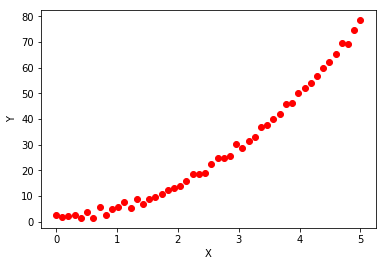

In [202]:
plt.plot(x,y, 'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [204]:
eps = 0.5
C = 5
initial = np.zeros(2*N_tr)
args = (eps, x_tr, y_tr, kernel)
bounds = []
for i in range(0,2*N_tr):
    bounds.append((0,C))
final = optimize.minimize(lagrange, initial, args, bounds=bounds, method='SLSQP')
a = final.x[0:N_tr]
a_hat = final.x[N_tr:2*N_tr]
print(a)
print(a_hat)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]


In [ ]:
def pred(a, a_hat)